In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
t = pd.read_csv('./data/Air_Traffic_Passenger_Statistics.csv')
t.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,201812,ABC Aerolineas S.A. de C.V. dba Interjet,4O,ABC Aerolineas S.A. de C.V. dba Interjet,4O,International,Mexico,Deplaned,Other,International,A,5179
1,201812,Volaris Airlines,Y4,Volaris Airlines,Y4,International,Mexico,Enplaned,Low Fare,International,A,2791
2,201812,Volaris Airlines,Y4,Volaris Airlines,Y4,International,Mexico,Deplaned,Low Fare,International,A,2111
3,201812,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,11359
4,201812,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,10645


In [11]:
inter_e = t[(t['Terminal']=='International') & (t['Activity Period']>201800) &(t['Activity Type Code']=='Enplaned')]
inter_e.head()

inter_d = t[(t['Terminal']=='International') & (t['Activity Period']>201800) &(t['Activity Type Code']=='Deplaned')]
inter_d.head()



,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,201812,ABC Aerolineas S.A. de C.V. dba Interjet,4O,ABC Aerolineas S.A. de C.V. dba Interjet,4O,International,Mexico,Deplaned,Other,International,A,5179
2,201812,Volaris Airlines,Y4,Volaris Airlines,Y4,International,Mexico,Deplaned,Low Fare,International,A,2111
4,201812,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,10645
6,201812,United Airlines,UA,United Airlines,UA,International,Middle East,Deplaned,Other,International,G,6353
10,201812,United Airlines,UA,United Airlines,UA,International,Mexico,Deplaned,Other,International,G,30085


In [12]:
from datetime import datetime
inter.reset_index(inplace=True, drop=True)
inter_e['Activity Period'] = pd.to_datetime(inter_e['Activity Period'], format='%Y%m')
inter_d['Activity Period'] = pd.to_datetime(inter_d['Activity Period'], format='%Y%m')


passenger_by_airline_e = inter.groupby(['GEO Region']).agg(['sum'])['Passenger Count'].reset_index()
passenger_by_airline_e.head()

passenger_by_airline_d = inter.groupby(['GEO Region']).agg(['sum'])['Passenger Count'].reset_index()
passenger_by_airline_d.head()



inter_e.reset_index(inplace=True, drop=True)
inter_e['Activity Period'] = pd.to_datetime(inter_e['Activity Period'], format='%Y%m')
inter_d.reset_index(inplace=True, drop=True)
inter_d['Activity Period'] = pd.to_datetime(inter_d['Activity Period'], format='%Y%m')

passenger_by_airline_e = inter.groupby(['GEO Region']).agg(['sum'])['Passenger Count'].reset_index()
passenger_by_airline_e.head()

passenger_by_airline_d = inter.groupby(['GEO Region']).agg(['sum'])['Passenger Count'].reset_index()
passenger_by_airline_d.head()


/Users/ziyuanhan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ziyuanhan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/ziyuanhan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,GEO Region,sum
0,Asia,5558517
1,Australia / Oceania,750051
2,Canada,1287654
3,Central America,377726
4,Europe,3954546


In [13]:
sorted(passenger_by_airline_e, key = lambda x: x[1])
sorted(passenger_by_airline_d, key = lambda x: x[1])

['GEO Region', 'sum']

In [14]:
end_e = passenger_by_airline.sort_values(by=['sum'], ascending=False)
end_e = end_e[end_e['GEO Region']!= 'US']

end_d = passenger_by_airline.sort_values(by=['sum'], ascending=False)
end_d = end_d[end_d['GEO Region']!= 'US']

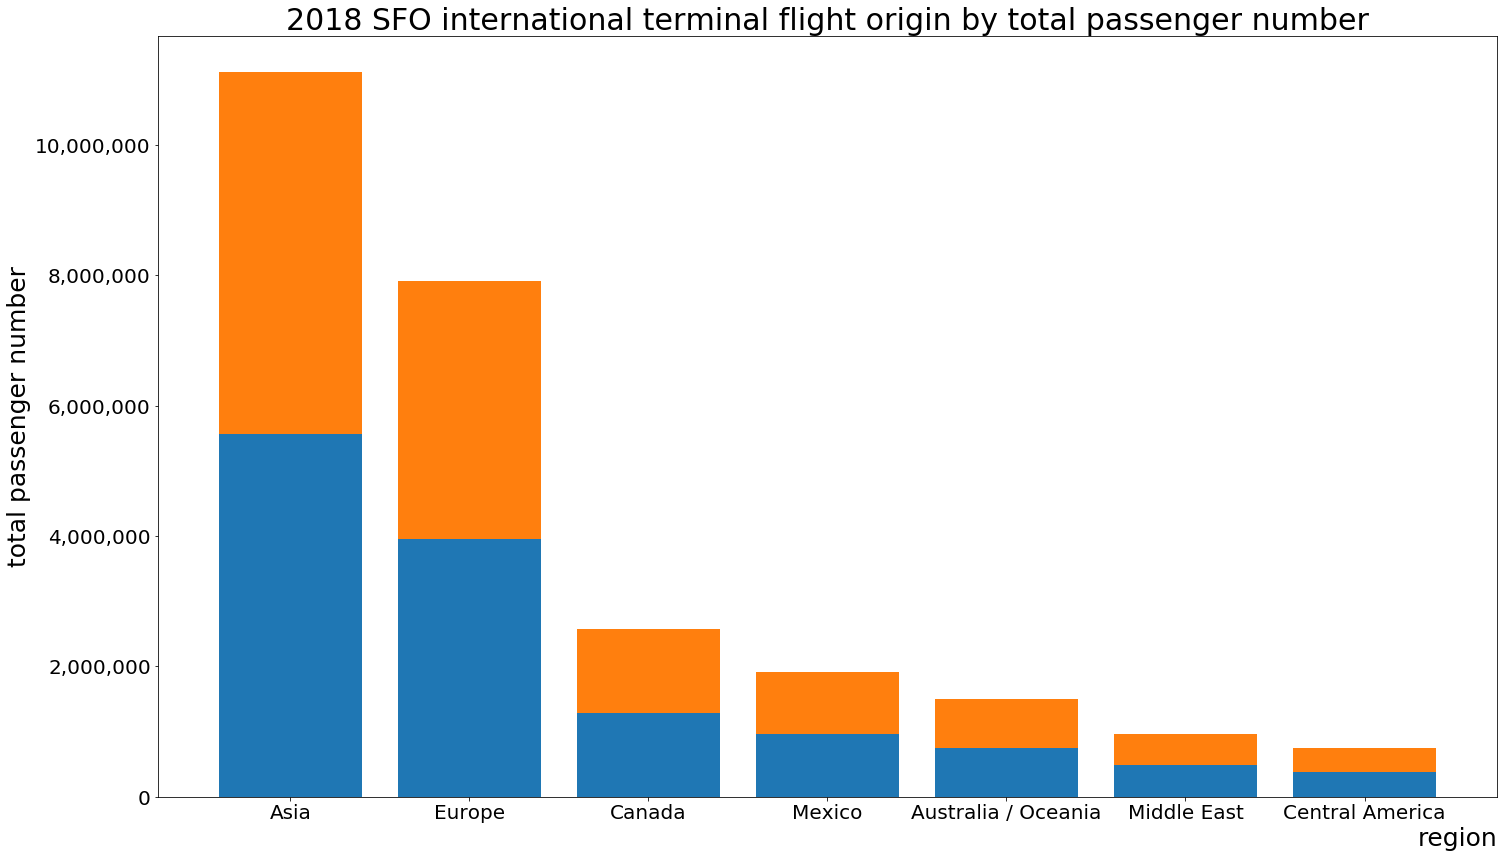

In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


x = np.arange(7)
t = end_e['GEO Region']
s = end_e['sum']
s2 = end_d['sum']

def millions(x, pos):
    'The two args are the value and tick position'
    return "{:,}".format(int(x))

formatter = FuncFormatter(millions)

fig, ax = plt.subplots(figsize=(24,14))
ax.yaxis.set_major_formatter(formatter)
plt.title("2018 SFO international terminal flight origin by total passenger number", fontsize=30)
plt.xlabel("region", horizontalalignment='right', x=1.0, y = 10, fontsize=25);
plt.ylabel("total passenger number", fontsize=25);
ax.tick_params(labelsize=20)
plt.bar(x, s)
plt.bar(x, s,bottom=s2)
plt.xticks(x, t)
plt.savefig('./plots/stack.png')
plt.show()

In [ ]:
from datetime import datetime
t['Activity Period'] = t['Activity Period'].apply(lambda x: int(x))

asia = t[t['GEO Region']=='Asia']
s = asia.groupby(['Activity Period']).agg(['sum'])['Passenger Count'].reset_index()
s.head()

In [ ]:
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return "{:,}".format(int(x))

formatter = FuncFormatter(millions)

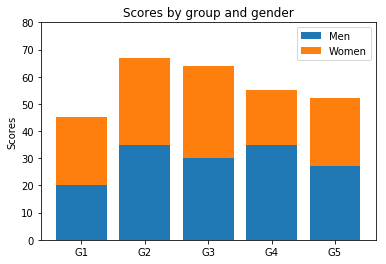

In [20]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans)
p2 = plt.bar(ind, womenMeans,
             bottom=menMeans)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()